#**Parkinsons Disease (PD) affects millions globally, and early detection is critical for better patient outcomes. This project explores whether acoustic features from voice recordings can be used to build a predictive model to classify individuals as either healthy or affected by Parkinsons Disease.**

#**Using machine learning, particularly logistic regression, we aim to develop a model that identifies the disease early using non-invasive, voice-based indicators. This analysis is supported by a Power BI dashboard for visual storytelling and interactive exploration by healthcare professionals.**


# **Importing necessary libraries**

In [ ]:
import pandas as pd

# **Uploading the csv file in df dataframe**

In [ ]:
df = pd.read_csv('/content/parkinsons.csv')

# **It displays the first 5 rows of the DataFrame df, helping to quickly inspect the dataset.** **Its commonly used to verify data structure, column names, and initial values.**

In [ ]:
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# **It shows the total number of missing (null) values in each column of the DataFrame df. It's used to quickly identify data quality issues before cleaning or analysis.**

In [ ]:
print(df.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


# **This will return the count of duplicate rows in the DataFrame df.This helps identify redundancy in the dataset, which can impact data accuracy and analysis outcomes.**

In [ ]:
print(df.duplicated().sum())

0


# **This code creates a bar plot that visually shows the distribution of Parkinson's disease status within the dataset. It helps to understand the balance between the two classes (healthy and Parkinson's) which is crucial information for further analysis and model building.**

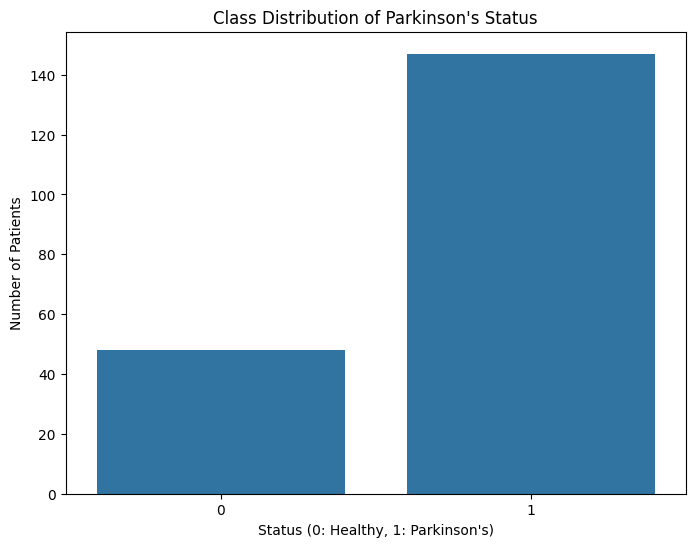

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'status' is the column name for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Class Distribution of Parkinson\'s Status')
plt.xlabel('Status (0: Healthy, 1: Parkinson\'s)')
plt.ylabel('Number of Patients')
plt.show()


# **Here we drop name column as it has no relevance in analysis**

In [ ]:
# prompt: Drop name column

df = df.drop(columns=['name'])


# **This  part of code prepares the dataset for machine learning by scaling the numerical features to a standard range, which can lead to better model performance.**

In [ ]:
# prompt: Standardize features (Z-score normalization).

from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and you want to standardize all numerical columns except 'status'
features_to_standardize = df.drop('status', axis=1).columns

scaler = StandardScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])
print(df.head())


   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   Shimmer:DDA       NHR       HNR  status      RPDE       DFA   spread1  

# **This section uses box plots to visually analyze the distribution of each numerical feature in the dataset and helps in identifying potential outliers, which are data points that significantly deviate from the rest of the data. Outliers can affect the results of statistical analysis and machine learning models, so it's important to identify and handle them appropriately.**

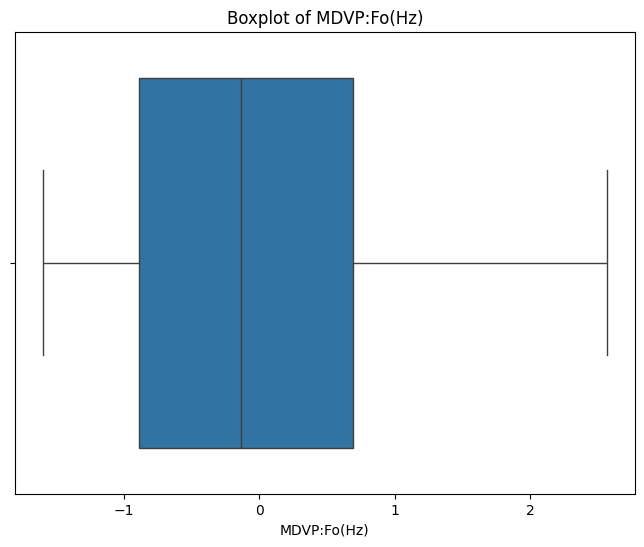

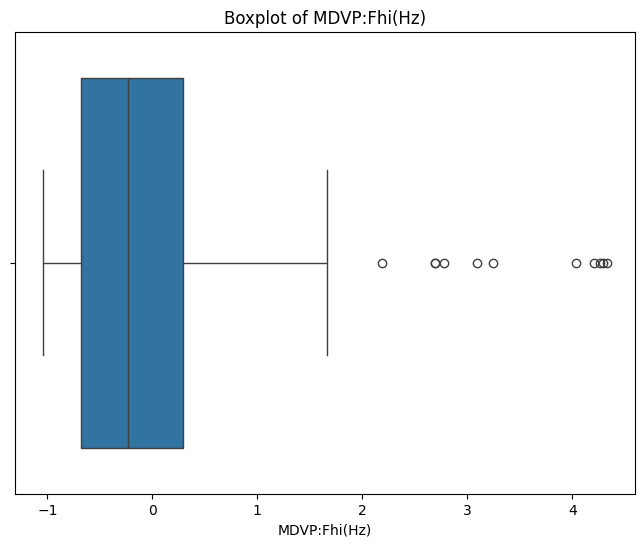

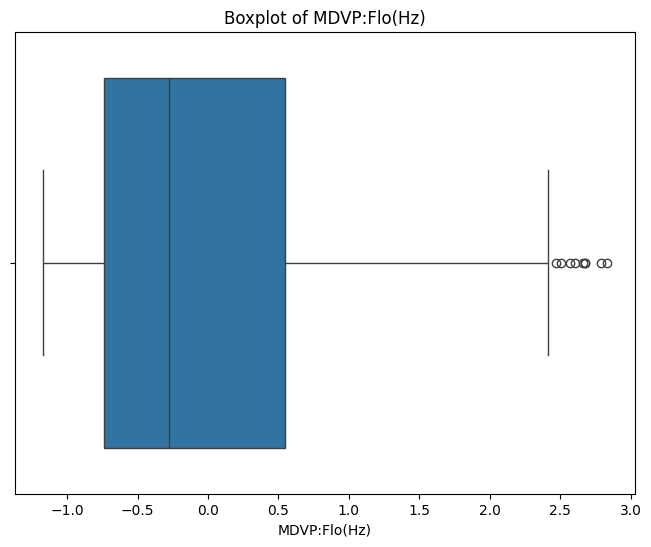

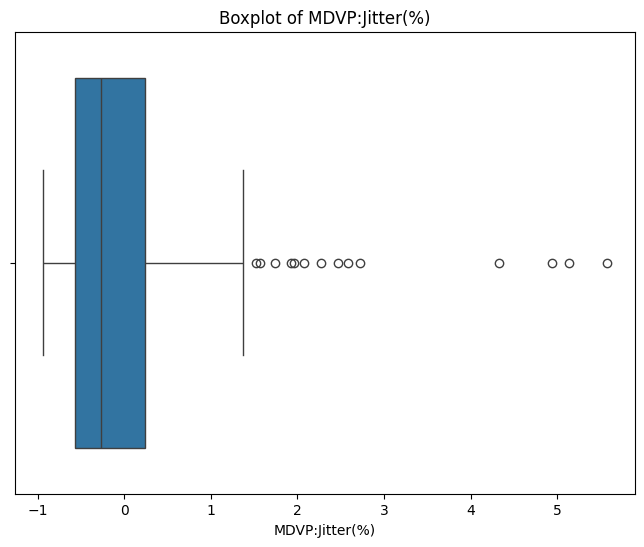

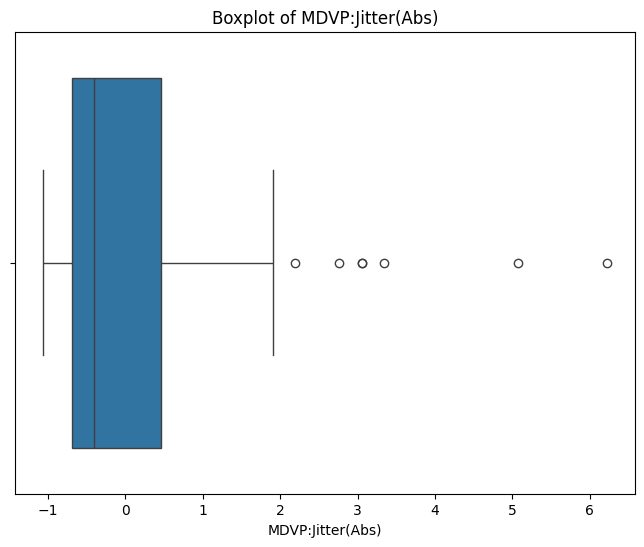

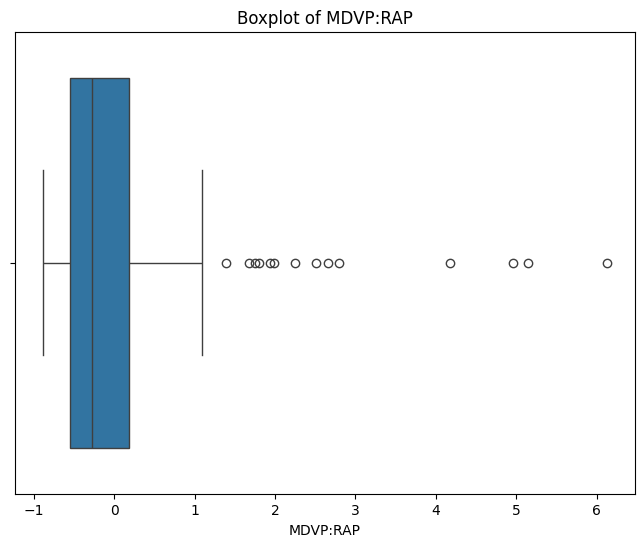

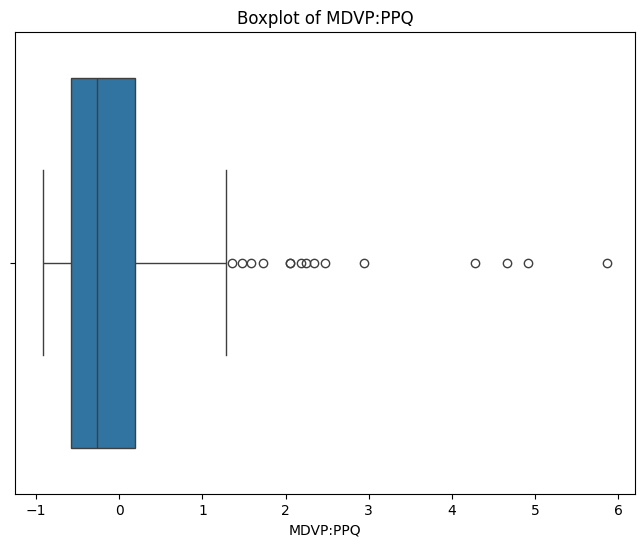

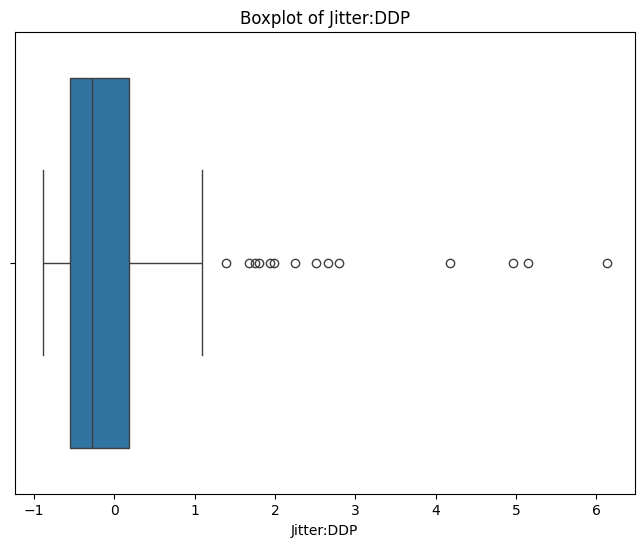

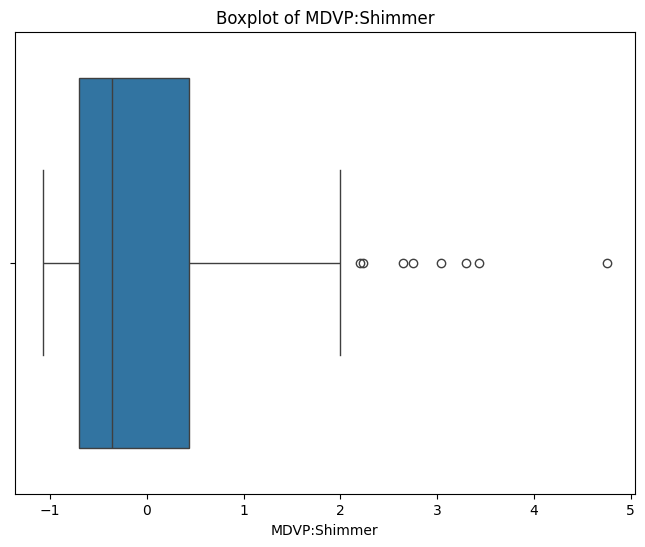

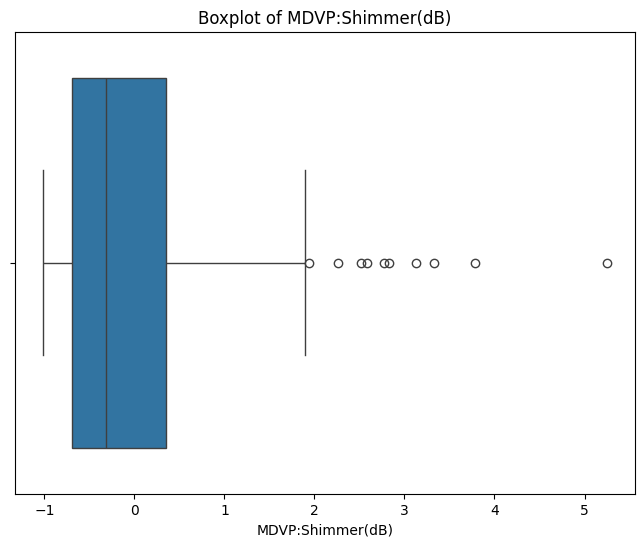

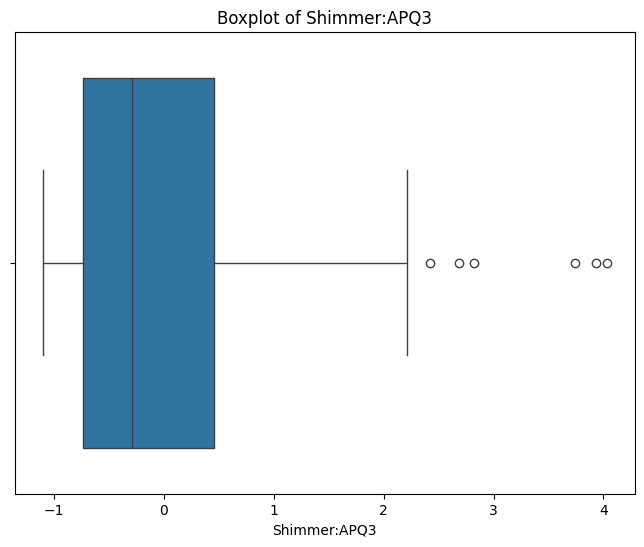

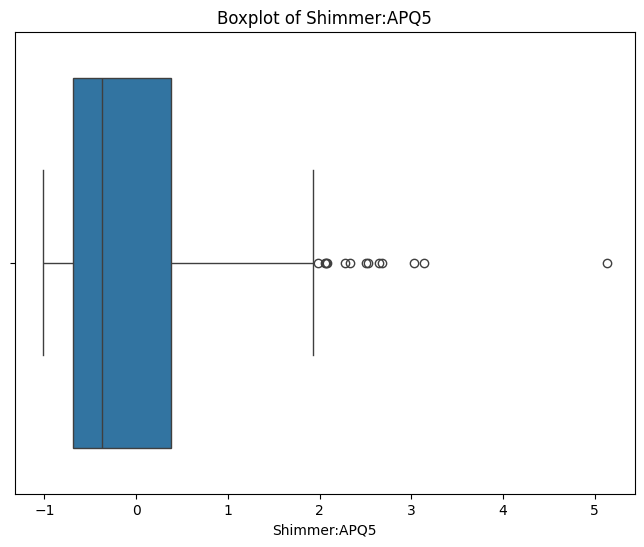

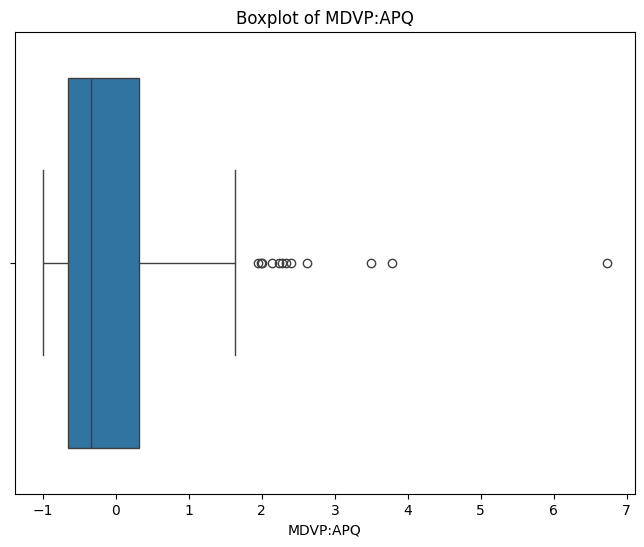

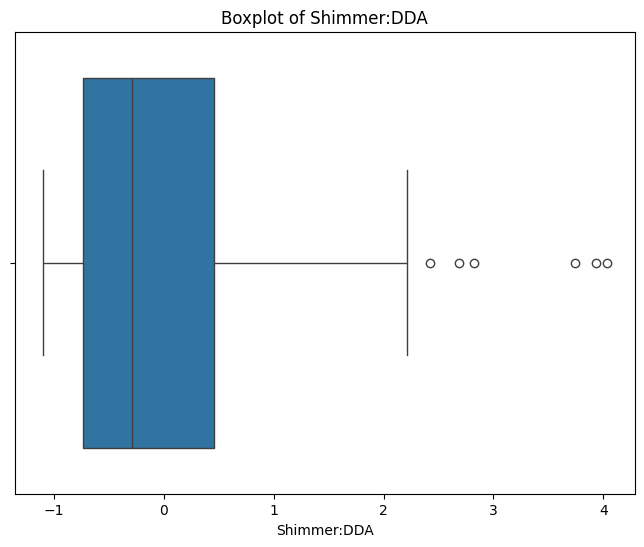

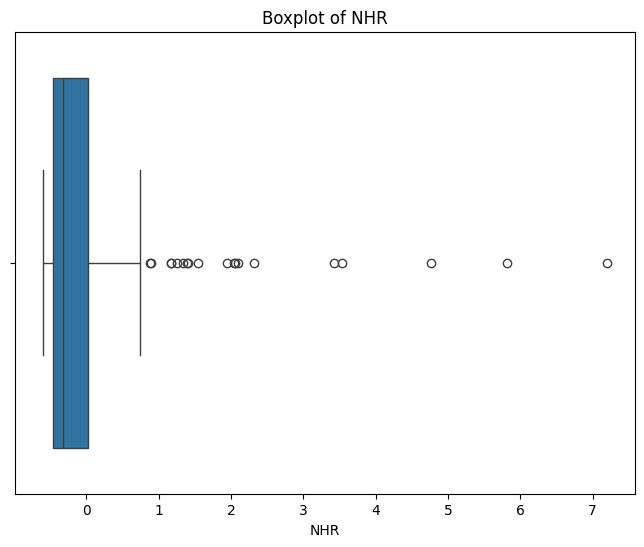

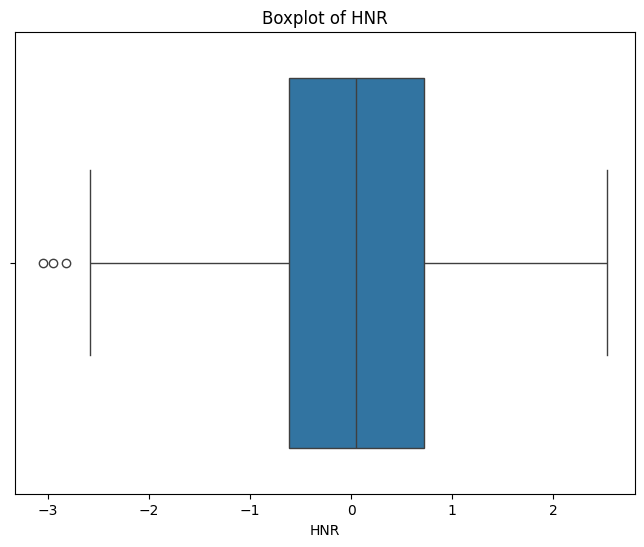

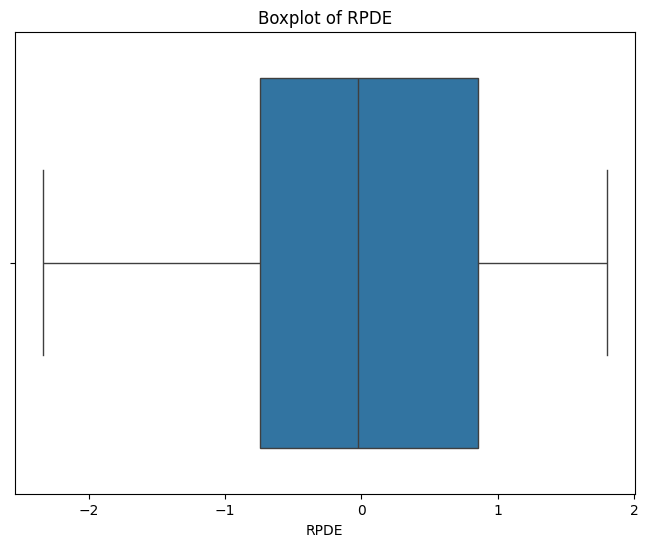

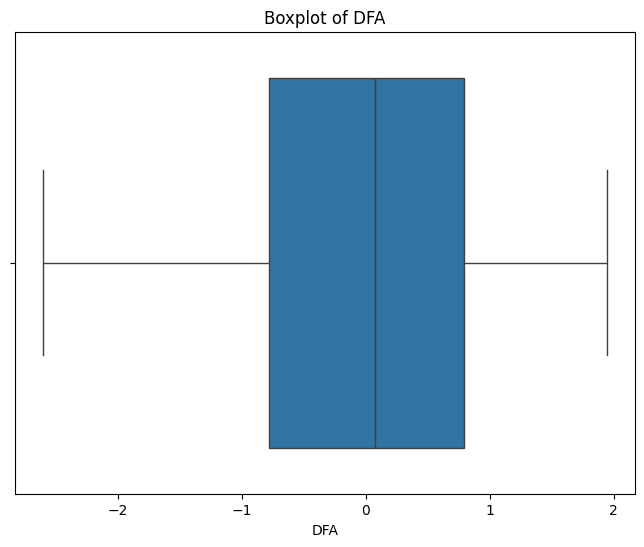

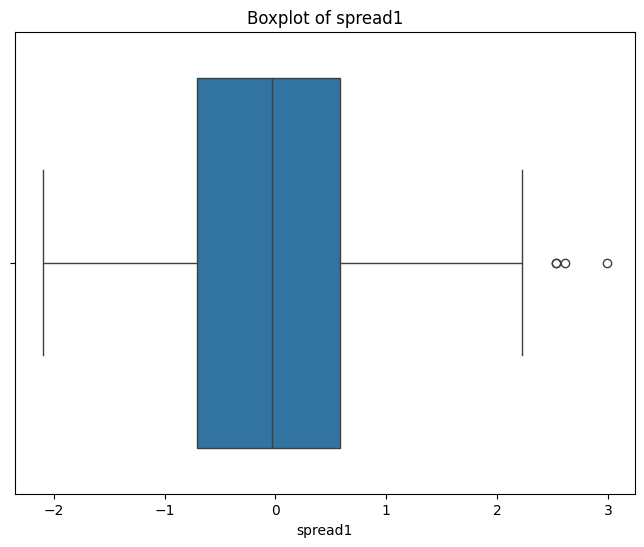

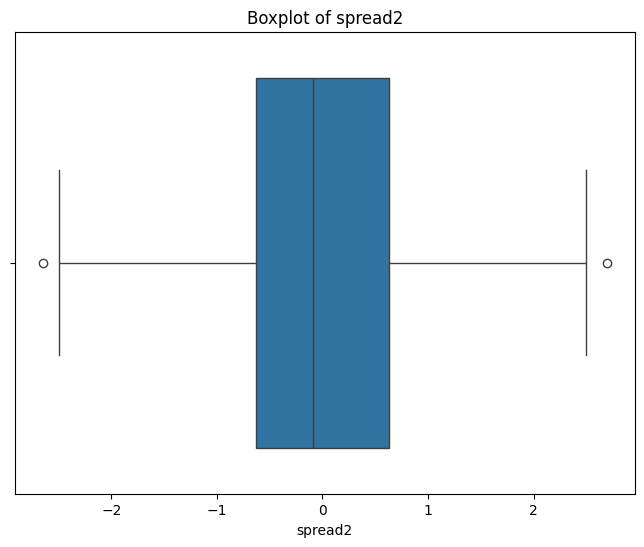

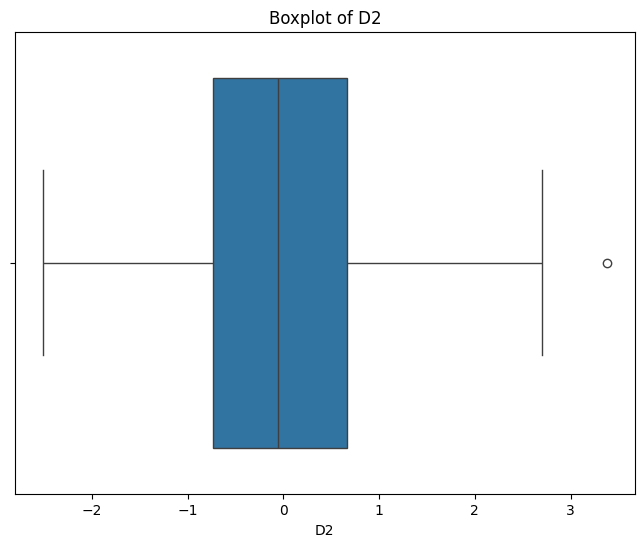

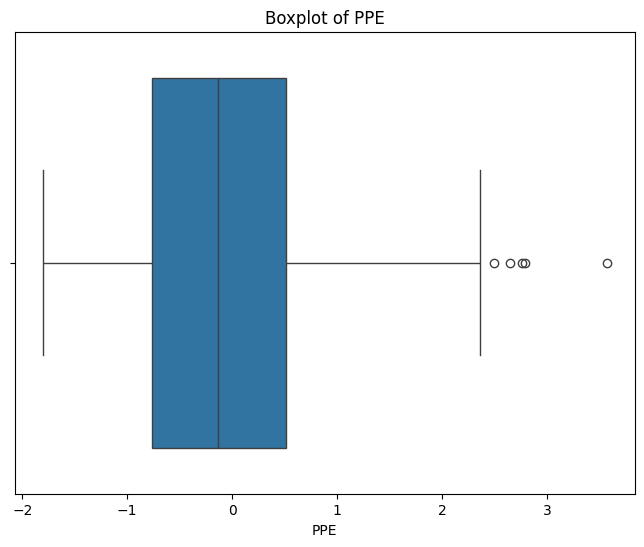

In [ ]:
# prompt: check outliers using boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'features_to_standardize' are the columns you want to plot
for column in features_to_standardize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


# **The code snippet aims to improve data quality by identifying and treating outliers in numerical features using the IQR method; it replaces extreme values with calculated boundaries, resulting in a dataset with fewer or no data points significantly deviating from the norm, visualized through box plots showing a reduced number of points beyond the whiskers, ultimately improving data robustness for further analysis.**

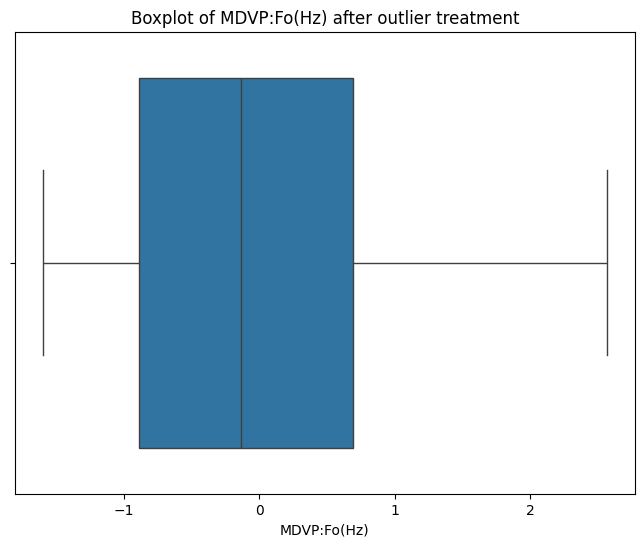

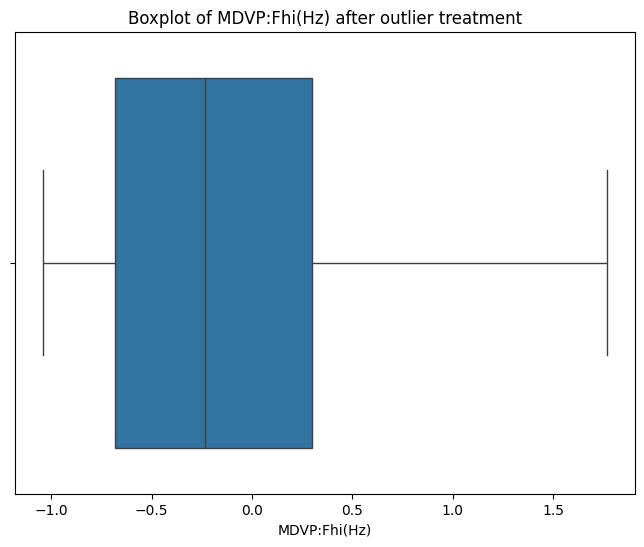

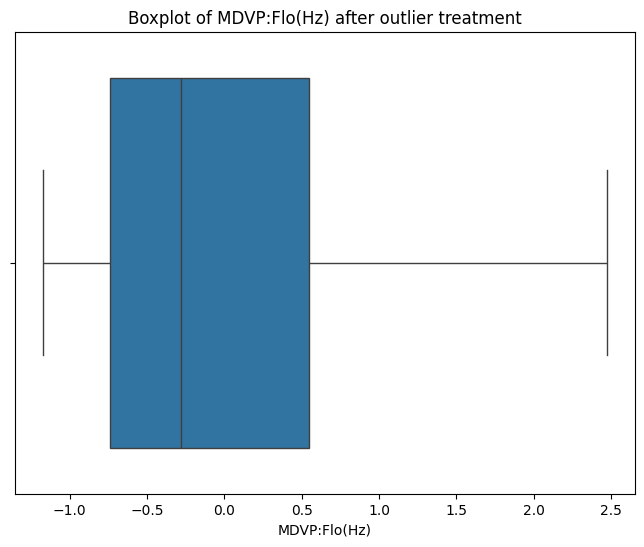

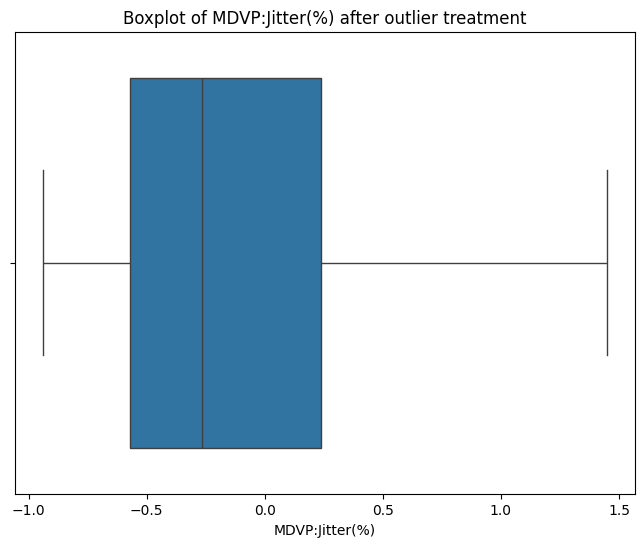

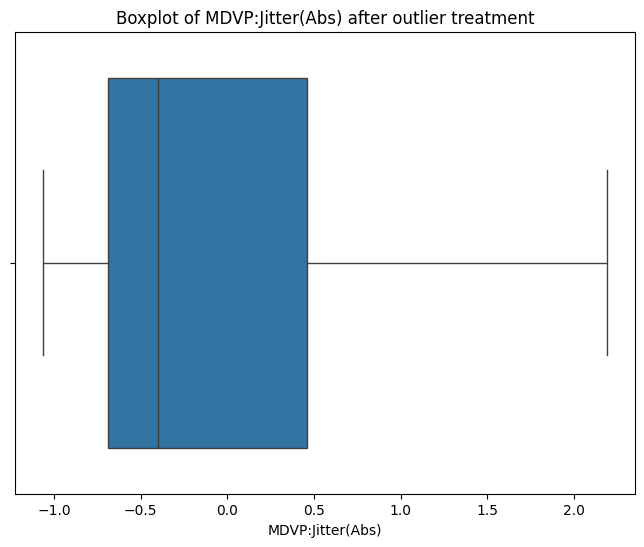

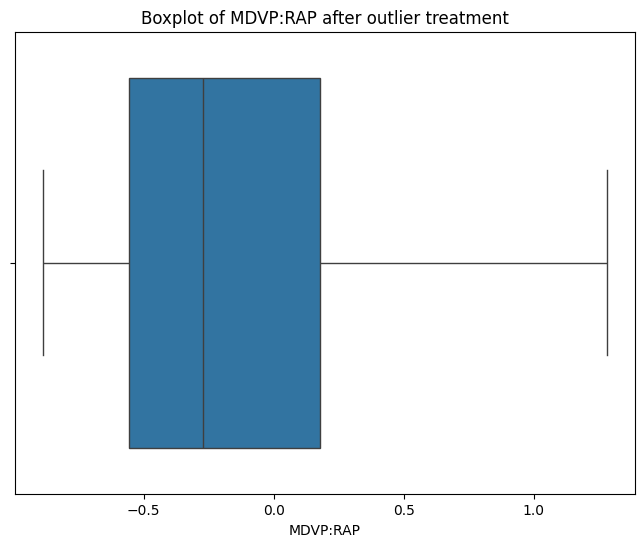

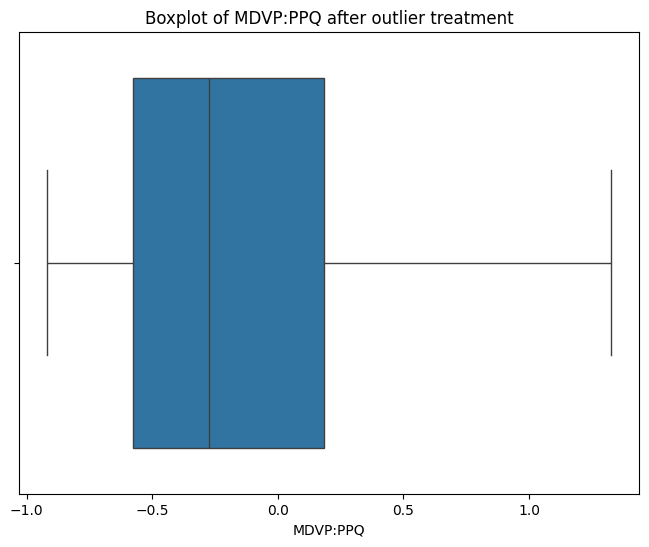

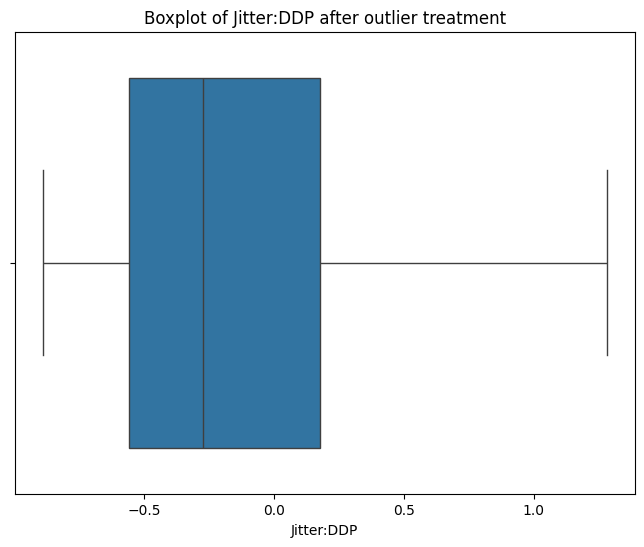

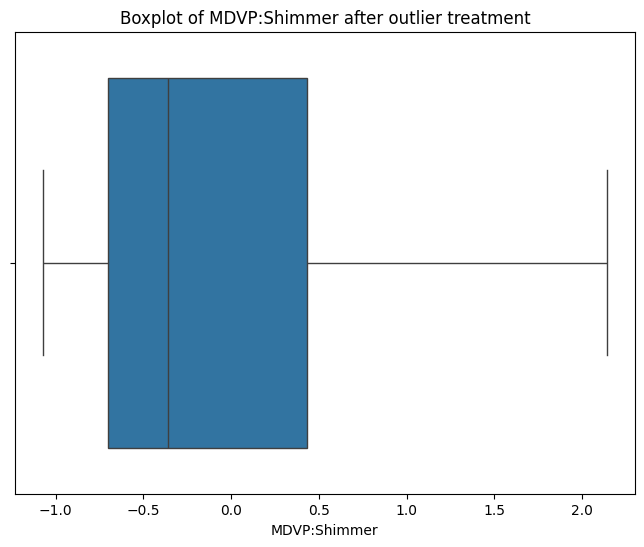

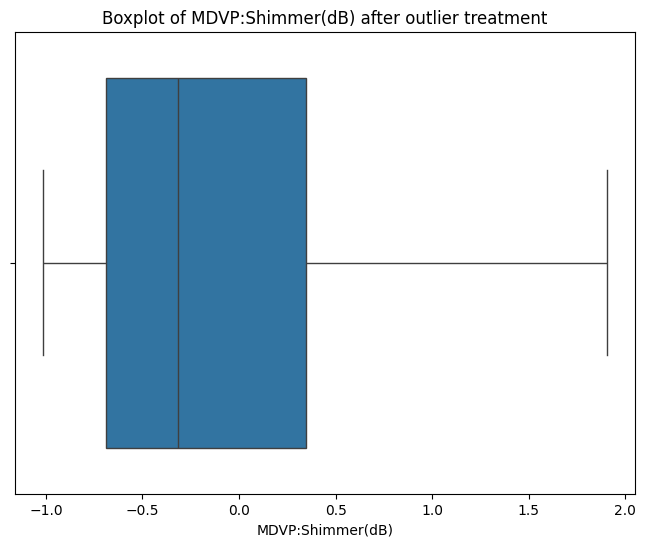

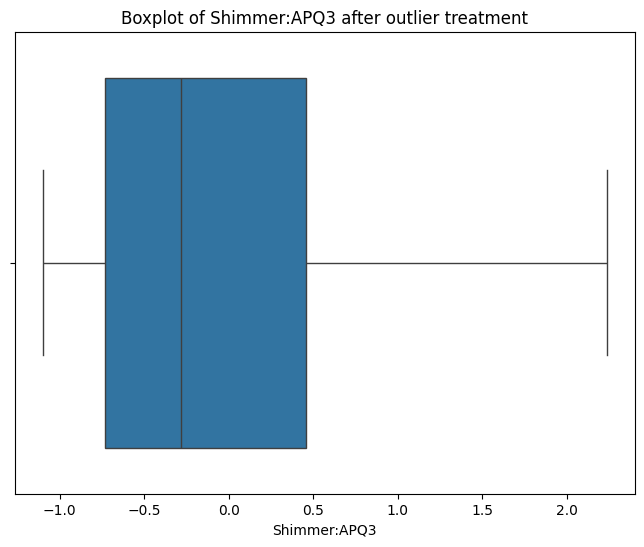

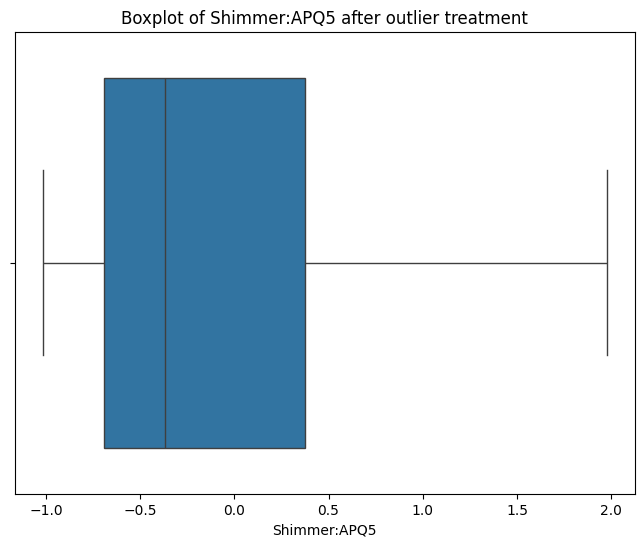

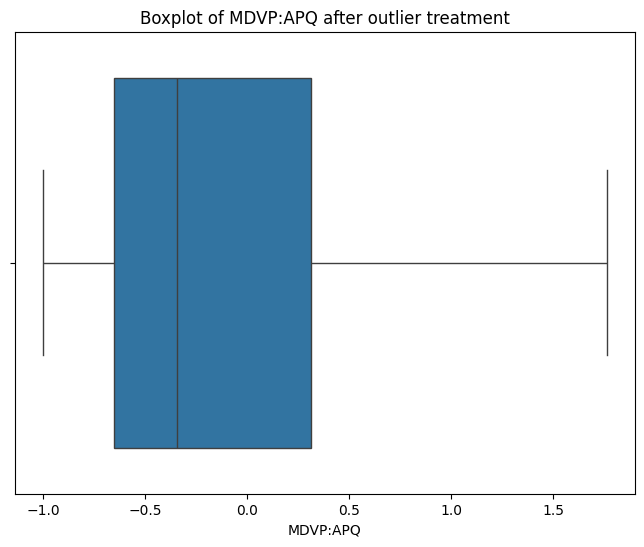

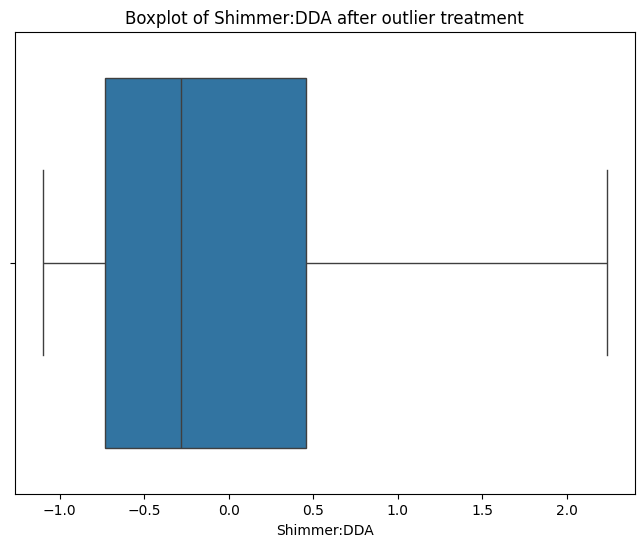

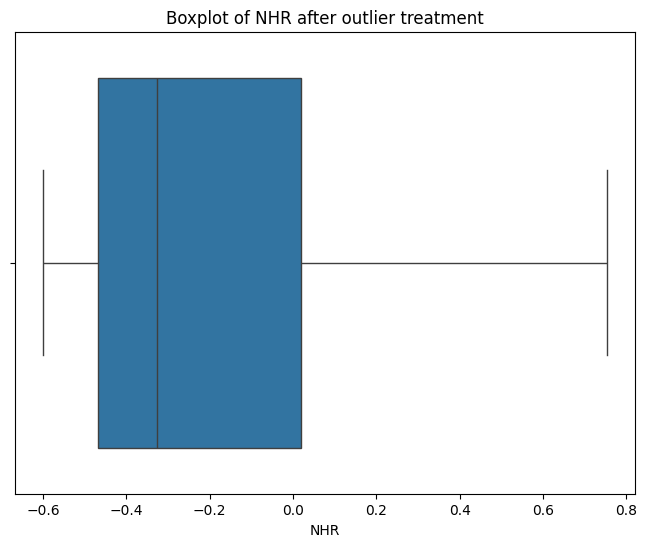

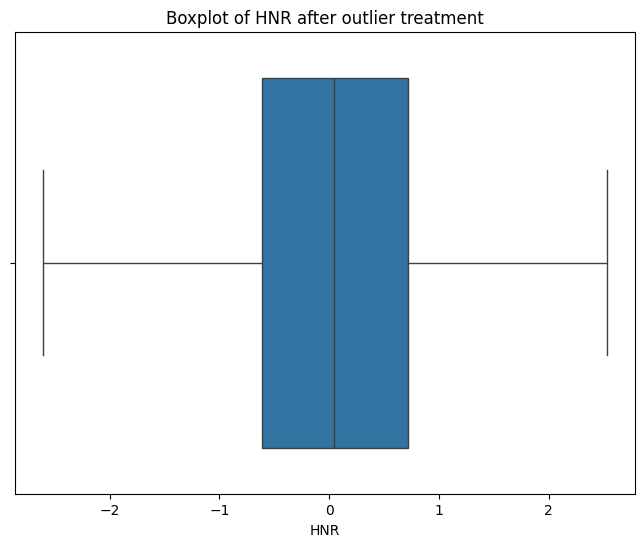

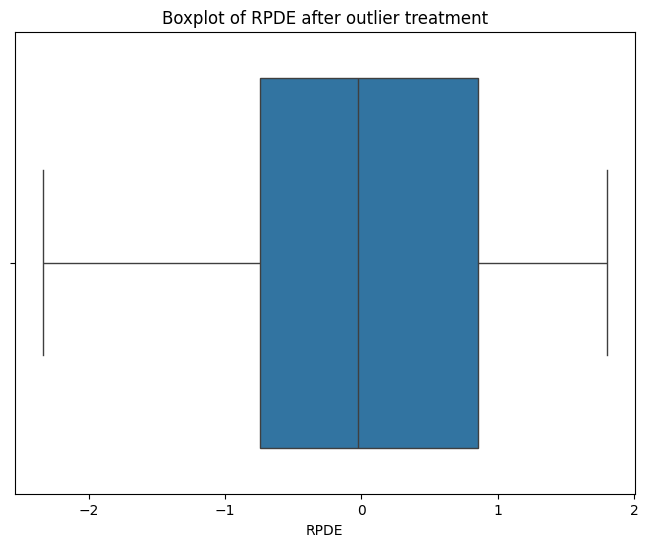

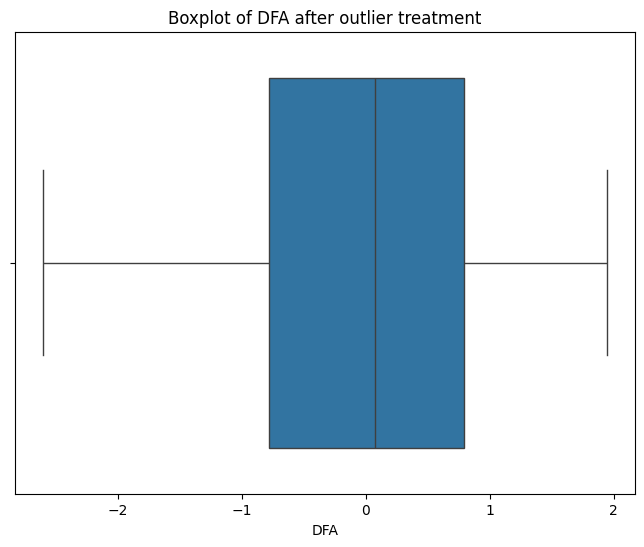

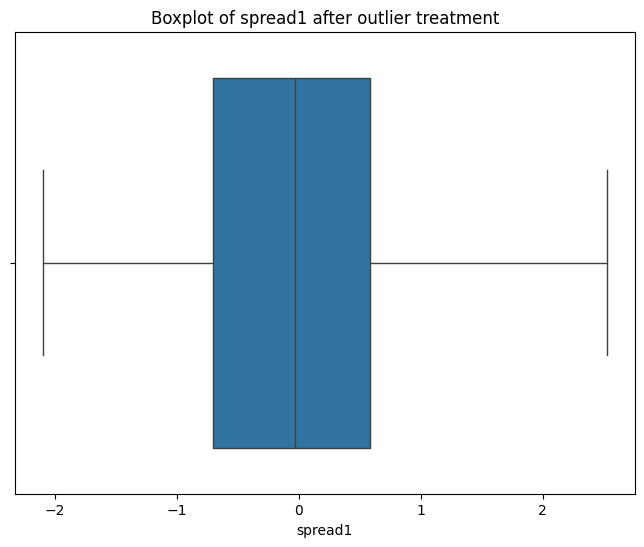

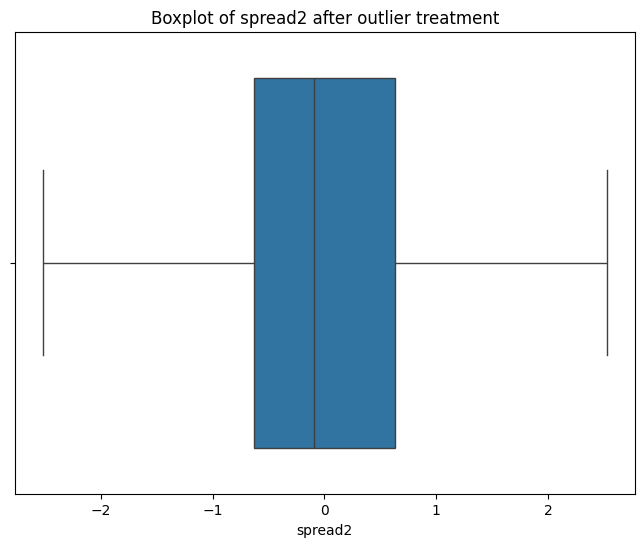

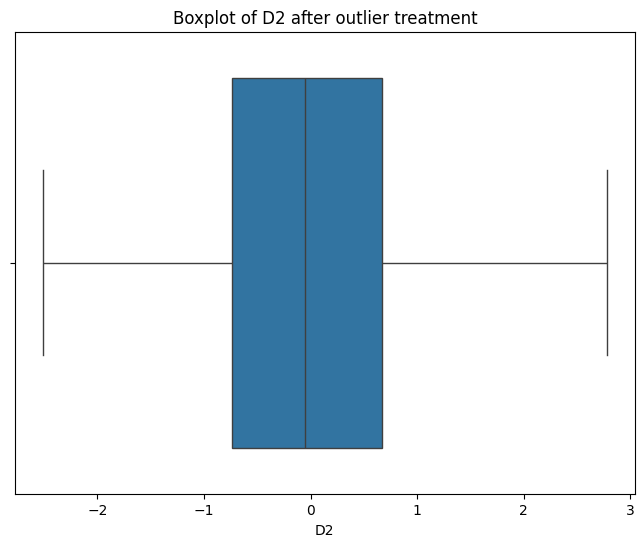

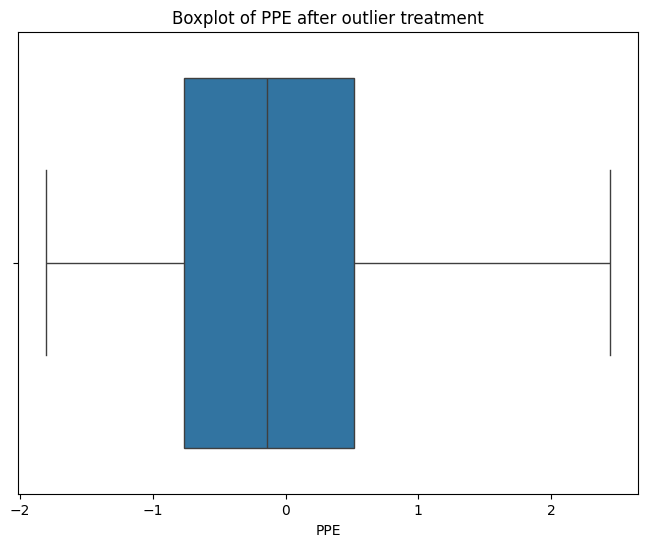

In [ ]:
# prompt: treat outliers

import matplotlib.pyplot as plt
import numpy as np

# Function to identify and treat outliers using IQR
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the nearest bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the function to each relevant column
for column in features_to_standardize:
    df = treat_outliers_iqr(df, column)

# Verify the result with boxplots
for column in features_to_standardize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after outlier treatment')
    plt.show()


# **This code snippet generates a heatmap that visually represents the correlation between different features in the dataset. It's a useful tool for exploratory data analysis and identifying potential relationships between variables.**

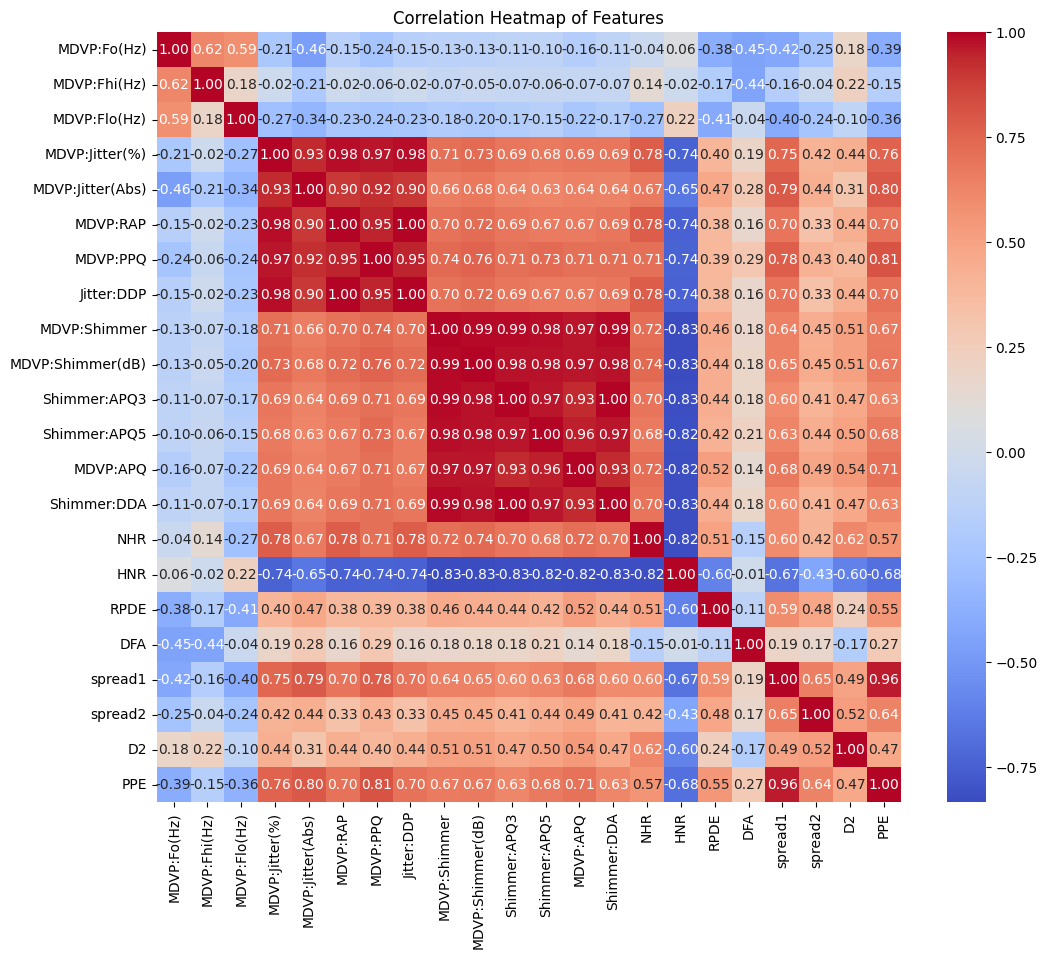

In [ ]:
# prompt: correlation heatmap

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'features_to_standardize' are the columns you want to include in the correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[features_to_standardize].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


# **This code block performs logistic regression to predict Parkinson's disease status based on selected features, then provides a detailed summary and insights into the model's performance and the importance of the features. I hope this explanation is helpful! Let me know if you have any other questions.**

In [ ]:
# prompt: logistic regression using stats model

import statsmodels.api as sm

# Assuming 'df' is your DataFrame, 'status' is the target variable, and 'features_to_standardize' are your features
X = df[features_to_standardize]
y = df['status']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

# You can access other model attributes like coefficients, p-values, etc.
# For example:
print(model.params)  # Model coefficients
print(model.pvalues)  # P-values for coefficients


Optimization terminated successfully.
         Current function value: 0.230800
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  195
Model:                          Logit   Df Residuals:                      172
Method:                           MLE   Df Model:                           22
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.5864
Time:                        05:10:59   Log-Likelihood:                -45.006
converged:                       True   LL-Null:                       -108.82
Covariance Type:            nonrobust   LLR p-value:                 7.023e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0836      1.020      4.004      0.000       2.085       6.083
MDVP:Fo(Hz

# **This code snippet will help us identify potential multicollinearity issues in your dataset by calculating and displaying the VIF for each feature. This information is crucial for building a reliable and interpretable regression model. High VIF values (typically above 5 or 10) indicate that a feature is highly correlated with other features and might need to be addressed (e.g., by removing it or combining it with other features).**

In [ ]:
# prompt: VIF

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your feature matrix (without the constant term)
X = df[features_to_standardize]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Display the VIF values
vif


,VIF Factor,features
0,6.811065e+00,MDVP:Fo(Hz)
1,2.191819e+00,MDVP:Fhi(Hz)
2,2.291330e+00,MDVP:Flo(Hz)
3,7.996634e+01,MDVP:Jitter(%)
4,2.253596e+01,MDVP:Jitter(Abs)
5,5.101904e+05,MDVP:RAP
6,5.782698e+01,MDVP:PPQ
7,5.099183e+05,Jitter:DDP
8,5.850049e+02,MDVP:Shimmer
9,9.149355e+01,MDVP:Shimmer(dB)


In [ ]:
# prompt: do step by step regression and remove insignificant columns

# Function to perform stepwise regression and remove insignificant columns
def stepwise_selection(X, y, significance_level=0.05):
    # Initialize the model with all features
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
    remaining_features = list(X.columns)
    removed_features = []

    while True:
        # Find the feature with the highest p-value
        p_values = model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()
        feature_to_remove = p_values.idxmax()

        # If the highest p-value is greater than the significance level, remove the feature
        if max_p_value > significance_level:
            remaining_features.remove(feature_to_remove)
            removed_features.append(feature_to_remove)
            X = X[remaining_features]
            model = sm.Logit(y, X).fit()  # Refit the model
            print(f"Removed feature: {feature_to_remove}, New p-values: {model.pvalues}")
        else:
            break  # Stop if no more features can be removed

    print("Stepwise selection complete.")
    return model, removed_features

# Perform stepwise regression
model, removed_features = stepwise_selection(X, y)

# Print the final model summary
print(model.summary())

# Print the removed features
print("Removed features:", removed_features)


Optimization terminated successfully.
         Current function value: 0.230800
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.230800
         Iterations 13
Removed feature: spread1, New p-values: const               0.000040
MDVP:Fo(Hz)         0.708200
MDVP:Fhi(Hz)        0.539667
MDVP:Flo(Hz)        0.674671
MDVP:Jitter(%)      0.214142
MDVP:Jitter(Abs)    0.615624
MDVP:RAP            0.862078
MDVP:PPQ            0.223145
Jitter:DDP          0.887680
MDVP:Shimmer        0.572654
MDVP:Shimmer(dB)    0.315887
Shimmer:APQ3        0.844749
Shimmer:APQ5        0.337236
MDVP:APQ            0.573680
Shimmer:DDA         0.837428
NHR                 0.553210
HNR                 0.934816
RPDE                0.529557
DFA                 0.291649
spread2             0.094772
D2                  0.470533
PPE                 0.005346
dtype: float64
Optimization terminated successfully.
         Current function value: 0.230818
         Iterations 1

# **This code snippet uses the predicted probabilities from a logistic regression model to calculate the AUC, which is a key metric for understanding the model's overall classification performance. A higher AUC value generally indicates better discrimination between the classes, with 1 being perfect classification and 0.5 representing random guessing.**

In [ ]:
# prompt: AUC

from sklearn.metrics import roc_auc_score

# Assuming y_test contains the true labels and y_pred_prob contains the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc = roc_auc_score(y_test, y_pred_prob)

print(f"AUC: {auc}")


AUC: 0.8392857142857142


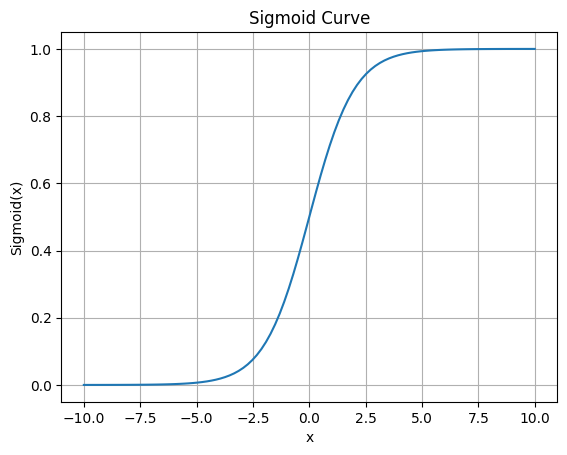

In [ ]:
# prompt: sigmoid curve

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Sigmoid Curve")
plt.grid(True)
plt.show()


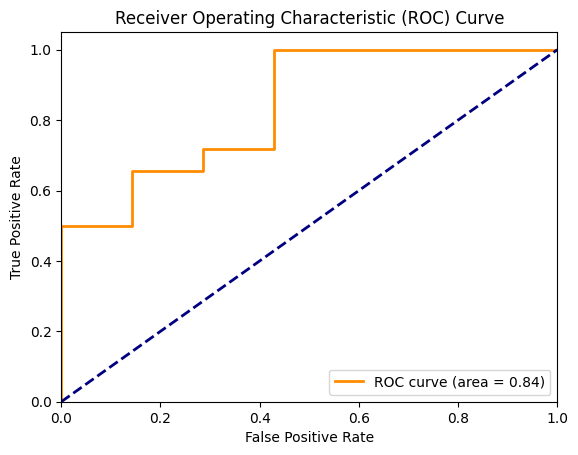

In [ ]:
# prompt: roc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test contains the true labels and y_pred_prob contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **This code snippet trains a Logistic Regression model, uses it to predict Parkinson's disease status on the entire dataset, and then visualizes the model's performance using a confusion matrix. The confusion matrix provides valuable insights into the types of errors the model is making, helping to assess its overall effectiveness. I hope this is helpful! Let me know if you have any other questions.**

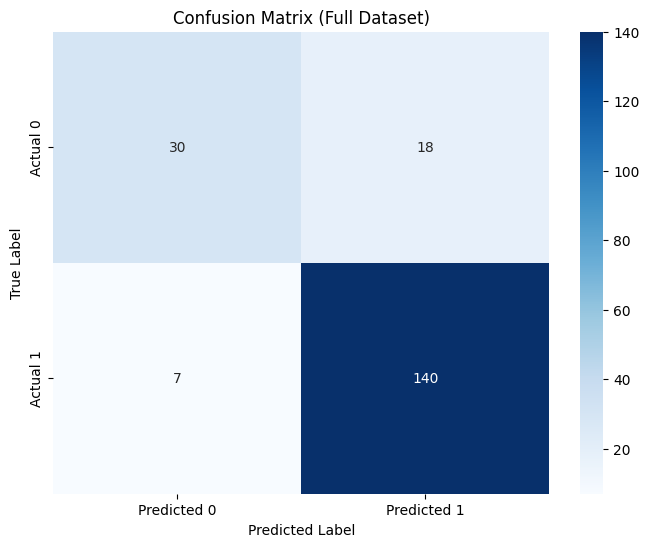

In [ ]:
# prompt: print confusion matrix on full dataset..

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = df[features_to_standardize]
y = df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred = logreg.predict(X)

# Calculate the confusion matrix for the full dataset
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Full Dataset)')
plt.show()


#**UNIVARIATE ANALYSIS**

# **This bar plot gives us a quick and informative view of the prevalence of Parkinson's disease in your dataset, which is vital for making informed decisions about subsequent data analysis and model building.**

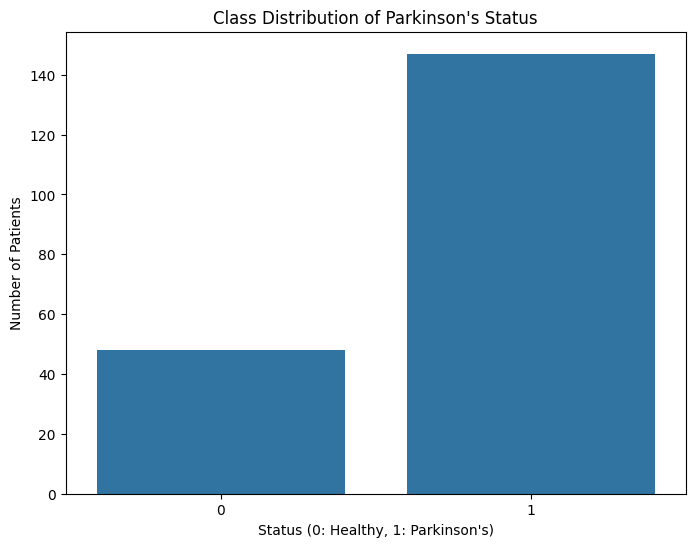

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'status' is the target variable column
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Class Distribution of Parkinson\'s Status')
plt.xlabel('Status (0: Healthy, 1: Parkinson\'s)')
plt.ylabel('Number of Patients')
plt.show()


# **The code visualizes the distributions of three vocal frequency features (MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz)) using histograms and KDE plots, allowing for an analysis of their typical ranges, central tendencies, spread, skewness, and potential outliers, which can be further investigated to identify vocal patterns associated with Parkinson's disease and potentially distinguish between healthy and affected individuals.**

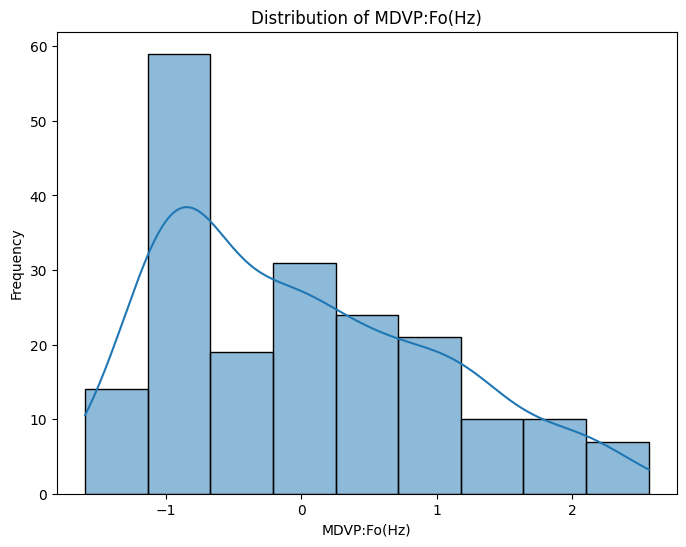

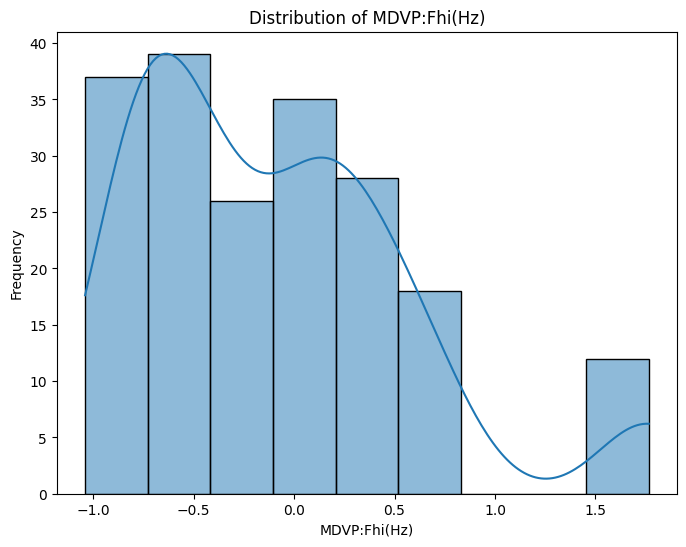

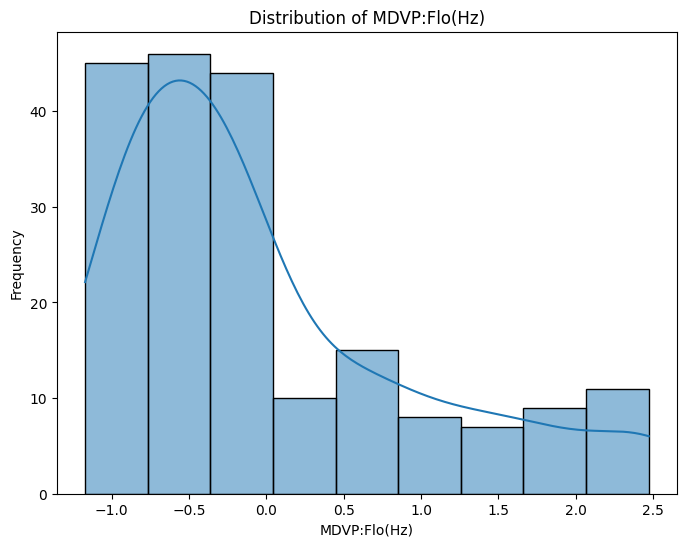

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'features_to_standardize' are the columns you want to plot
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)  # Histogram with KDE plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# **The code snippet generates two scatter plots to visually explore relationships between pairs of features (NHR vs. HNR and D2 vs. PPE) and their potential relevance in distinguishing between healthy individuals and Parkinson's patients, by analyzing the correlation, clustering patterns, outliers, and class separation based on the distribution and color-coding of data points.**

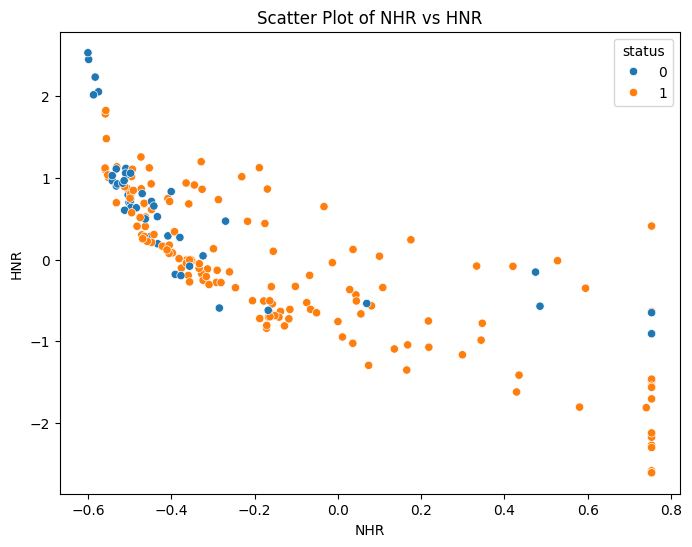

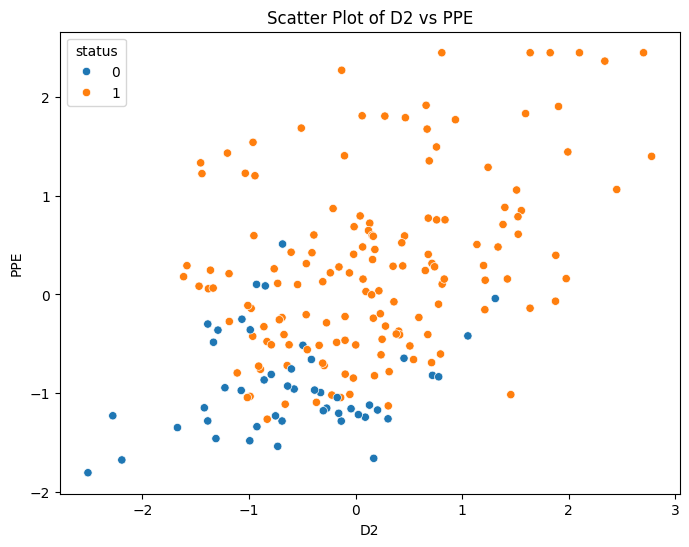

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'features_to_standardize' are the columns you want to plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NHR', y='HNR', data=df, hue='status') # Replace 'NHR', 'HNR' with your actual column names
plt.title('Scatter Plot of NHR vs HNR')
plt.xlabel('NHR')
plt.ylabel('HNR')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='D2', y='PPE', data=df, hue='status') # Replace 'D2', 'PPE' with your actual column names
plt.title('Scatter Plot of D2 vs PPE')
plt.xlabel('D2')
plt.ylabel('PPE')
plt.show()


# **The violin plot of HNR vs. status reveals that individuals with Parkinson's disease tend to have lower and less variable HNR values compared to healthy individuals, suggesting that HNR could be a potential feature for distinguishing between the two groups, although further analysis is needed to confirm its diagnostic significance.**

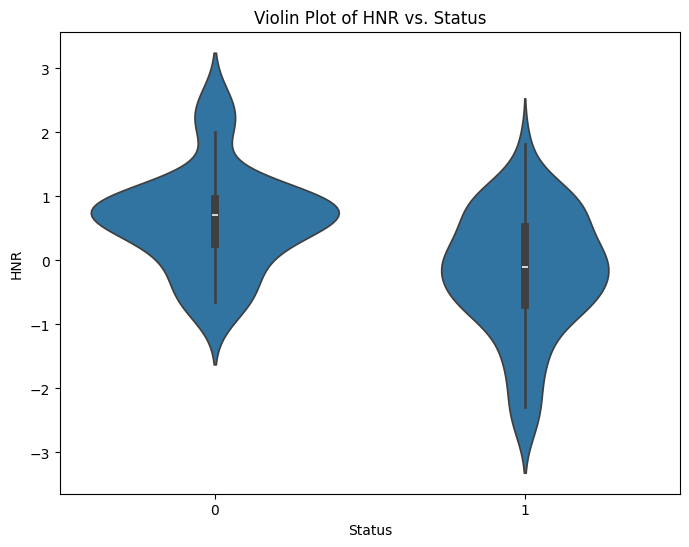

In [ ]:
# prompt: Violin Plot	Numeric vs Categorical (density + spread)	HNR vs status

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.violinplot(x='status', y='HNR', data=df)
plt.title('Violin Plot of HNR vs. Status')
plt.xlabel('Status')
plt.ylabel('HNR')
plt.show()


# **Looking at the jitter in people's voices, we see a pattern: those with Parkinson's disease tend to have more jitter, and it varies more widely than in healthy voices. This suggests that shaky speech might be a sign of Parkinson's, but we need more research to say for sure if it's a reliable indicator.**

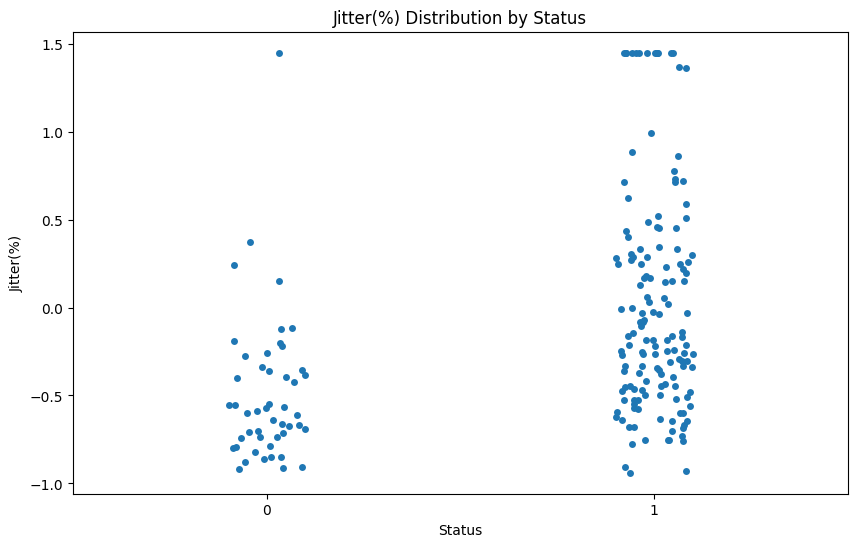

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Jitter(%)' and 'status' are your columns
plt.figure(figsize=(10, 6))
sns.stripplot(x='status', y='MDVP:Jitter(%)', data=df, jitter=True)  # Use stripplot for jitter
plt.title('Jitter(%) Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Jitter(%)')
plt.show()


# **By visualizing voice features like average, highest, and lowest vocal frequencies, we can start to see how they relate to each other and if they might be useful in identifying Parkinson's disease. The plots might show us patterns or groups that separate healthy voices from those with Parkinson's. While these visual clues are interesting, more research is needed to determine if these voice features can reliably diagnose the disease.**



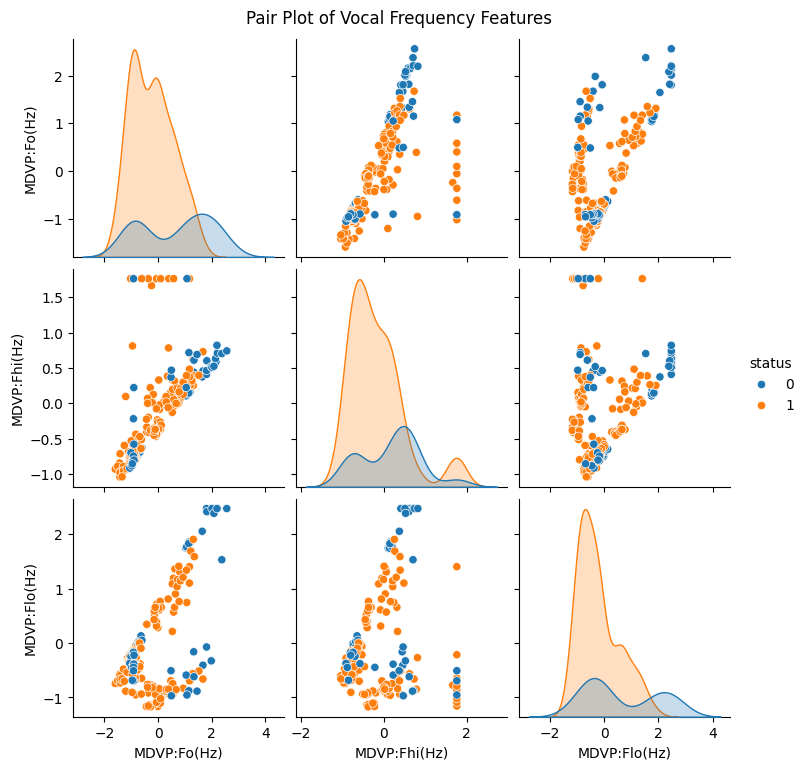

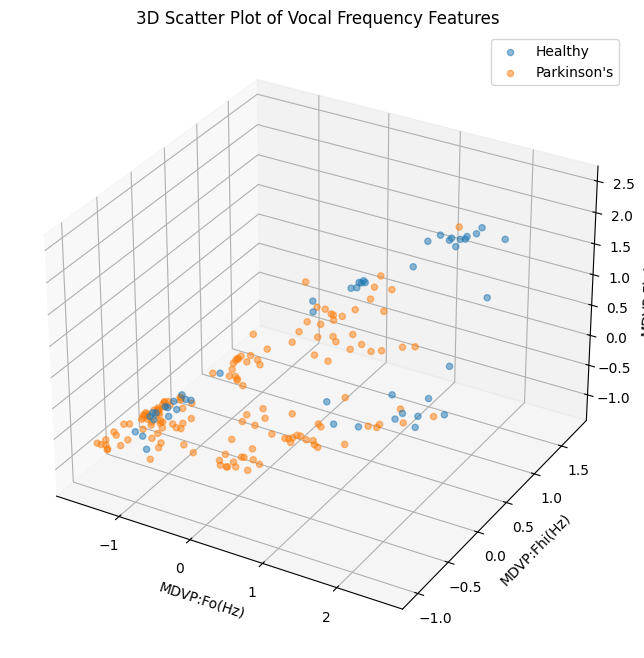

In [ ]:

# Assuming 'df' is your DataFrame and 'features_to_standardize' are defined
# ... (Your existing code) ...

# Pair Plot for 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
sns.pairplot(df[features + ['status']], hue='status')  # Include 'status' for color-coding
plt.suptitle('Pair Plot of Vocal Frequency Features', y=1.02) # Add a title
plt.show()

# 3D Plot for 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate data points based on 'status'
healthy = df[df['status'] == 0]
parkinson = df[df['status'] == 1]

ax.scatter(healthy['MDVP:Fo(Hz)'], healthy['MDVP:Fhi(Hz)'], healthy['MDVP:Flo(Hz)'], label='Healthy', alpha=0.5)
ax.scatter(parkinson['MDVP:Fo(Hz)'], parkinson['MDVP:Fhi(Hz)'], parkinson['MDVP:Flo(Hz)'], label='Parkinson\'s', alpha=0.5)


ax.set_xlabel('MDVP:Fo(Hz)')
ax.set_ylabel('MDVP:Fhi(Hz)')
ax.set_zlabel('MDVP:Flo(Hz)')
ax.set_title('3D Scatter Plot of Vocal Frequency Features')
ax.legend()
plt.show()


# **The 3D plot provides a way to visualize the relationship between the three vocal frequency features simultaneously. It can help to identify patterns or clusters that might not be as obvious in a 2D plot, potentially indicating that a combination of these features could be useful for diagnosing Parkinson's disease.**

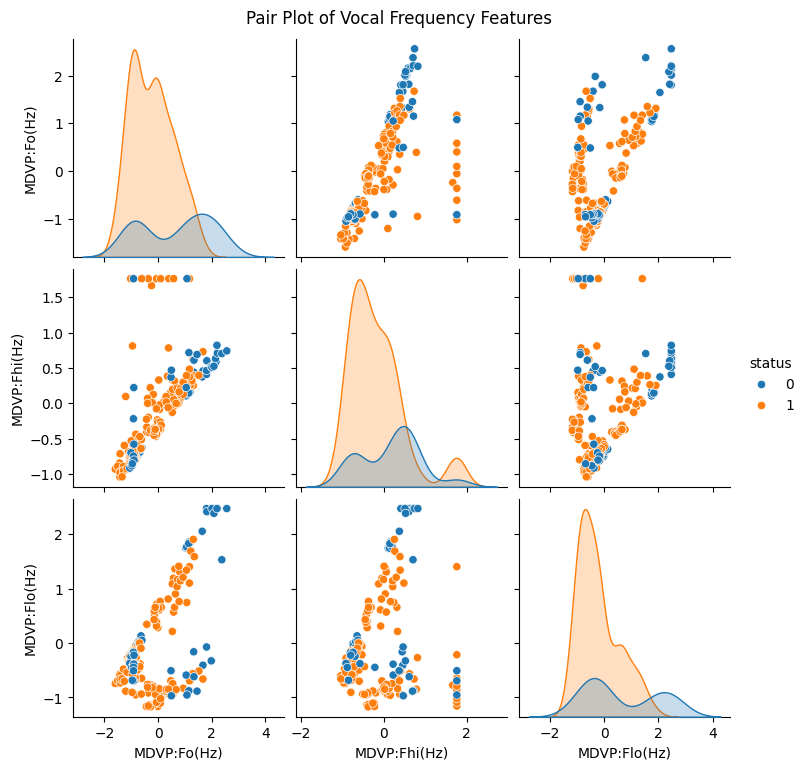

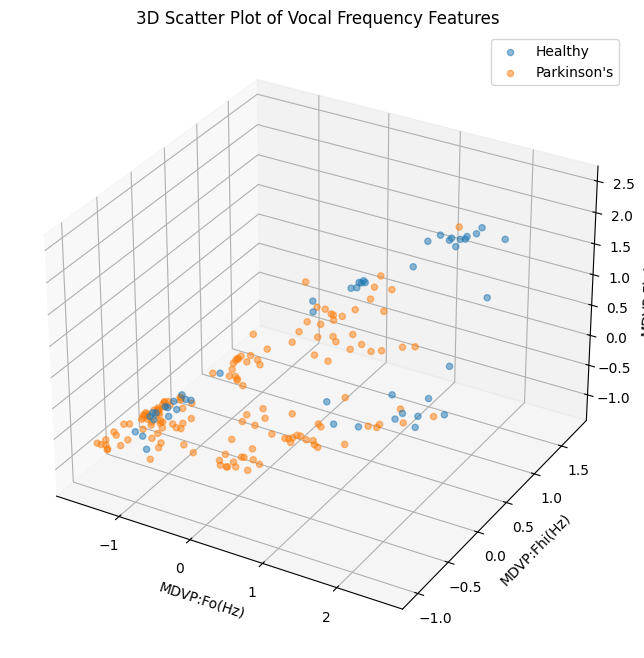

In [ ]:
# Pair Plot for 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
sns.pairplot(df[features + ['status']], hue='status')  # Include 'status' for color-coding
plt.suptitle('Pair Plot of Vocal Frequency Features', y=1.02) # Add a title
plt.show()

# 3D Plot for 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate data points based on 'status'
healthy = df[df['status'] == 0]
parkinson = df[df['status'] == 1]

ax.scatter(healthy['MDVP:Fo(Hz)'], healthy['MDVP:Fhi(Hz)'], healthy['MDVP:Flo(Hz)'], label='Healthy', alpha=0.5)
ax.scatter(parkinson['MDVP:Fo(Hz)'], parkinson['MDVP:Fhi(Hz)'], parkinson['MDVP:Flo(Hz)'], label='Parkinson\'s', alpha=0.5)


ax.set_xlabel('MDVP:Fo(Hz)')
ax.set_ylabel('MDVP:Fhi(Hz)')
ax.set_zlabel('MDVP:Flo(Hz)')
ax.set_title('3D Scatter Plot of Vocal Frequency Features')
ax.legend()
plt.show()